# L15-Clustering

# 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Loading</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clustering</a></span></li></ul></div>

# 

The Data Set: The data set used in this example is based on a famous Scotish Whiskies data set. This website contains the original data set, but you need to be careful with using this data set as the LAT and LONG coordinates are not in the normal international format. The following data set contains two additional variables that contain the internationally recognized coordinates and these are recognized by Google Maps and all other mapping tools.

## Data Loading

Let’s get started and read in the data set

In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option("max_columns", None)

List subsets of records and variables
Here we only display the first 10 records and variables 1-14. (numbering starts at Zero)
ROWID variable is exclude and some of the location variables

In [4]:
craftbeer_df = pd.read_csv("recipeData.csv", encoding='latin-1')

In [5]:
craftbeer_df.head()

,BeerID,Name,URL,Style,StyleID,Size,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [6]:
craftbeer_df.shape

(73861, 23)

In [7]:
## Filter the dataset to extract only the IPA recipe data rows from the Craft Beer Recipe data
df_IPA = craftbeer_df[craftbeer_df['StyleID'] == 7]

In [8]:
df_IPA.shape

(11940, 23)

In [9]:
df_IPA.head()

,BeerID,Name,URL,Style,StyleID,Size,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
10,11,Bakke Brygg HveteIPA 25 L,/homebrew/recipe/view/73890/bakke-brygg-hvetei...,American IPA,7,25.00,1.064,1.014,6.63,64.26,7.78,29.00,90,1.055,74.0,NaN,Specific Gravity,All Grain,1.0,18.0,Sukkerlake,6 5 g sukker/L,18325.0
11,12,Hop Notch Clone,/homebrew/recipe/view/10092/hop-notch-clone,American IPA,7,15.14,1.066,1.015,6.62,111.00,14.26,11.36,90,NaN,70.0,NaN,Specific Gravity,BIAB,NaN,NaN,NaN,NaN,NaN
12,13,Racer 5 IPA Clone,/homebrew/recipe/view/23246/racer-5-ipa-clone,American IPA,7,20.82,1.073,1.019,7.07,69.72,6.28,28.39,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN


In [10]:
df_IPA.columns

Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size', 'OG', 'FG', 'ABV',
       'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency',
       'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate', 'PrimaryTemp',
       'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object')

######   

## Data Preparation

Remove Outliers and unwanted IPA feature values

In [11]:
df_IPA = df_IPA.dropna(subset=['Size', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'Efficiency', 'BoilTime'])

In [12]:
df_IPA.shape

(11940, 23)

Deleting rows containing following outliers

·         ABV > 25%

In [13]:
df_IPA = df_IPA[df_IPA['ABV'] < 25]

In [14]:
df_IPA.shape

(11938, 23)

Deleting rows containing following outliers

·         IBU > 150

In [15]:
df_IPA = df_IPA[df_IPA['IBU'] < 150]

In [16]:
df_IPA.shape

(11457, 23)

In [17]:
df_IPA = df_IPA[df_IPA['Color'] > 0.5]

In [18]:
df_IPA.shape

(11451, 23)

In [19]:
df_IPA = df_IPA[df_IPA['Efficiency'] < 85]

In [20]:
df_IPA.shape

(11194, 23)

In [21]:
df_IPA = df_IPA[df_IPA['Size'] < 50]

In [22]:
df_IPA.shape

(10565, 23)

Let us define the subset of variable to use for clustering

In [23]:
df_IPA.columns

Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size', 'OG', 'FG', 'ABV',
       'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency',
       'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate', 'PrimaryTemp',
       'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object')

In [24]:
X = df_IPA.iloc[:, [5, 6, 7, 8, 9, 10, 12, 14]]

In [25]:
X.head(17)

,Size,OG,FG,ABV,IBU,Color,BoilTime,Efficiency
2,18.93,1.0630,1.0180,5.91,59.25,8.98,60,70.0
3,22.71,1.0610,1.0170,5.80,54.48,8.50,60,70.0
10,25.00,1.0640,1.0140,6.63,64.26,7.78,90,74.0
11,15.14,1.0660,1.0150,6.62,111.00,14.26,90,70.0
12,20.82,1.0730,1.0190,7.07,69.72,6.28,60,70.0
13,18.93,1.0660,1.0170,6.51,60.96,10.54,60,30.0
14,37.85,1.0640,1.0170,6.20,64.67,3.91,60,70.0
17,20.82,1.0730,1.0180,7.14,61.83,8.10,60,75.0
19,21.77,1.0620,1.0130,6.50,53.30,5.20,60,70.0
24,21.00,1.0620,1.0140,6.29,53.57,5.21,70,73.0


Scale the Data

In [26]:
# scale the data by mean and standard deviation

In [27]:
trans = StandardScaler()

In [28]:
trans.fit(X)

StandardScaler()

In [29]:
X = pd.DataFrame(trans.transform(X), columns=X.columns)

In [30]:
X.head(17)

,Size,OG,FG,ABV,IBU,Color,BoilTime,Efficiency
0,-0.366039,-0.136619,-0.118685,-0.488610,-0.267537,0.103838,-0.283076,0.359591
1,0.095107,-0.137657,-0.121646,-0.593881,-0.445083,0.011006,-0.283076,0.359591
2,0.374478,-0.136101,-0.130529,0.200435,-0.081057,-0.128242,2.397242,0.645839
3,-0.828404,-0.135063,-0.127568,0.190865,1.658677,1.124988,2.397242,0.359591
4,-0.135466,-0.131431,-0.115724,0.621519,0.122173,-0.418341,-0.283076,0.359591
5,-0.366039,-0.135063,-0.121646,0.085594,-0.203888,0.405541,-0.283076,-2.502886
6,1.942128,-0.136101,-0.121646,-0.211078,-0.065796,-0.876698,-0.283076,0.359591
7,-0.135466,-0.131431,-0.118685,0.688509,-0.171505,-0.066354,-0.283076,0.717401
8,-0.019570,-0.137138,-0.133490,0.076024,-0.489005,-0.627213,-0.283076,0.359591
9,-0.113507,-0.137138,-0.130529,-0.124947,-0.478955,-0.625279,0.610363,0.574277


In [31]:
X.shape

(10565, 8)

## Clustering

Do the clustering – But how many Clusters – Use the elbow method to determine the optional number of clusters to use

In [32]:
# Using the elbow method to find the optimal number of clusters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [33]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=3000,n_init=100,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

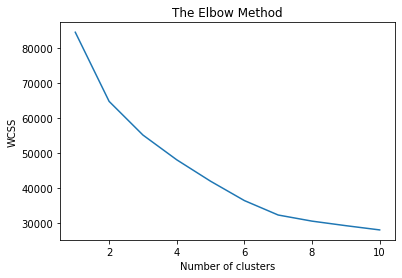

None


In [34]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.show()
print(plt.show())

Let’s use 4 for the number of cluster build the cluster model based on having 4 clusters. Then fit the model using the data set defined above.

In [35]:
# Applying k-means to the craft beer dataset
kmeans_model = KMeans(n_clusters=7,init='k-means++',max_iter=3000,n_init=100,random_state=0) 

Now get predicted clusters for each redords and attach it to the dataframe

In [36]:
y_kmeans = kmeans_model.fit_predict(X)

In [37]:
y_kmeans

array([3, 3, 6, ..., 3, 3, 3])

What are the centre and mid-points of the clusters?

In [38]:
kmeans_model.cluster_centers_

array([[ 2.34174765e+00, -1.36219430e-01, -1.29583549e-01,
         8.01766803e-02,  4.90428211e-02, -1.39804094e-01,
        -7.42860369e-02,  4.70247360e-01],
       [ 4.81382476e-02,  7.22089273e+00,  6.91530697e+00,
         1.40655113e-02, -1.86306427e-04,  6.16985596e-02,
         1.63643555e-01,  1.87068021e-01],
       [-2.96445414e-01, -1.33595142e-01, -1.27257627e-01,
         6.10169845e-01,  6.94273797e-01, -7.25812685e-02,
        -2.62475843e-01,  3.66713394e-01],
       [-2.79377604e-01, -1.36970513e-01, -1.31709416e-01,
        -4.05447074e-01, -6.13669113e-01, -2.00278001e-01,
        -3.01847763e-01,  3.72487676e-01],
       [ 8.66443783e-03, -1.34226968e-01, -1.25288705e-01,
         3.72913293e-01,  2.50866444e-01,  4.90363657e+00,
         1.29928869e-01, -6.16789517e-02],
       [-4.24417957e-01, -1.32130768e-01, -1.28529239e-01,
        -3.56598350e-01,  8.84518748e-02, -6.69629770e-02,
        -4.27812008e-01, -2.13143681e+00],
       [ 9.49287586e-02, -1.354790

Now get the predicted clusters for each record and attach it to the dataframe

In [39]:
X.columns

Index(['Size', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilTime', 'Efficiency'], dtype='object')

In [40]:
y = kmeans_model.predict(X)

Now get predicted clusters for each redords and attach it to the dataframe

In [41]:
y_df = pd.DataFrame(y)
cluster_results = df_IPA
cluster_results["CLUSTER_NUM"] = y_df
cluster_results.head(20)

,BeerID,Name,URL,Style,StyleID,Size,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId,CLUSTER_NUM
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.0630,1.0180,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN,6.0
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.0610,1.0170,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN,6.0
10,11,Bakke Brygg HveteIPA 25 L,/homebrew/recipe/view/73890/bakke-brygg-hvetei...,American IPA,7,25.00,1.0640,1.0140,6.63,64.26,7.78,29.00,90,1.055,74.0,NaN,Specific Gravity,All Grain,1.00,18.00,Sukkerlake,6 5 g sukker/L,18325.0,3.0
11,12,Hop Notch Clone,/homebrew/recipe/view/10092/hop-notch-clone,American IPA,7,15.14,1.0660,1.0150,6.62,111.00,14.26,11.36,90,NaN,70.0,NaN,Specific Gravity,BIAB,NaN,NaN,NaN,NaN,NaN,3.0
12,13,Racer 5 IPA Clone,/homebrew/recipe/view/23246/racer-5-ipa-clone,American IPA,7,20.82,1.0730,1.0190,7.07,69.72,6.28,28.39,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN,3.0
13,14,Sam Adams Rebel IPA Clone,/homebrew/recipe/view/106996/sam-adams-rebel-i...,American IPA,7,18.93,1.0660,1.0170,6.51,60.96,10.54,11.36,60,1.110,30.0,NaN,Specific Gravity,extract,0.35,18.33,NaN,NaN,23595.0,2.0
14,15,White IPA,/homebrew/recipe/view/8361/white-ipa,American IPA,7,37.85,1.0640,1.0170,6.20,64.67,3.91,34.07,60,1.071,70.0,1.20,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN,2.0
17,18,Bells two hearted clone,/homebrew/recipe/view/3837/bells-two-hearted-c...,American IPA,7,20.82,1.0730,1.0180,7.14,61.83,8.10,24.61,60,1.061,75.0,NaN,Specific Gravity,All Grain,0.75,18.33,NaN,NaN,955.0,3.0
19,20,Avg. Perfect Northeast IPA (NEIPA),/homebrew/recipe/view/363082/avg-perfect-north...,American IPA,7,21.77,1.0620,1.0130,6.50,53.30,5.20,28.39,60,1.048,70.0,1.25,Specific Gravity,All Grain,NaN,NaN,Keg - Force Carb.,NaN,NaN,3.0
24,25,NEIPA Hoppy ( juicy) - Braumeister 20L,/homebrew/recipe/view/295897/neipa-hoppy-juicy...,American IPA,7,21.00,1.0620,1.0140,6.29,53.57,5.21,25.00,70,1.052,73.0,NaN,Specific Gravity,BIAB,0.75,20.00,NaN,NaN,54364.0,0.0


In [42]:
cluster_results.shape

(10565, 24)

How many records are in each cluster?

In [43]:
cluster_results.groupby(['CLUSTER_NUM']).size()

CLUSTER_NUM
0.0    146
1.0     26
2.0    386
3.0    536
4.0     31
5.0    203
6.0    143
dtype: int64

In [44]:
cluster_results.describe()

,BeerID,StyleID,Size,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId,CLUSTER_NUM
count,10565.000000,10565.0,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10208.000000,10565.000000,6085.000000,4962.000000,7678.000000,3347.000000,1471.000000
mean,38276.642593,7.0,21.930412,1.326336,1.058084,6.420560,66.437686,8.443092,26.166762,63.168386,1.269872,64.975104,2.000770,0.675867,19.588450,42640.100388,2.993202
std,21491.333423,0.0,8.197368,1.927611,0.337750,1.044974,26.867454,5.170886,11.492045,11.193233,1.585452,13.974571,1.440905,0.313582,3.356776,28046.074762,1.635892
min,3.000000,7.0,2.000000,1.003000,1.001000,0.080000,0.000000,0.640000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.780000,87.000000,0.000000
25%,19530.000000,7.0,18.930000,1.058000,1.012000,5.870000,51.090000,5.760000,20.820000,60.000000,1.045000,65.000000,1.400000,0.350000,18.330000,20648.000000,2.000000
50%,39560.000000,7.0,20.820000,1.063000,1.014000,6.440000,64.560000,7.260000,26.500000,60.000000,1.050000,70.000000,1.500000,0.750000,20.000000,42612.000000,3.000000
75%,56744.000000,7.0,22.710000,1.069000,1.017000,7.000000,80.130000,9.510000,28.500000,60.000000,1.058000,75.000000,2.850000,1.000000,20.000000,56718.500000,4.000000
max,73861.000000,7.0,49.210000,23.220200,6.281110,20.220000,149.910000,50.000000,429.640000,210.000000,22.900000,84.000000,50.000000,2.000000,80.000000,134362.000000,6.000000


In [45]:
df_4 = cluster_results[cluster_results['CLUSTER_NUM'] == 3.0]     

In [46]:
df_4.shape

(536, 24)

In [47]:
df_4a = cluster_results[cluster_results["CLUSTER_NUM"].isnull()]

In [48]:
df_4a

,BeerID,Name,URL,Style,StyleID,Size,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId,CLUSTER_NUM
10578,10579,Orange IPA,/homebrew/recipe/view/484614/orange-ipa,American IPA,7,19.49,1.067,1.019,6.31,113.84,6.63,28.39,60,1.046,70.0,1.33,Specific Gravity,All Grain,NaN,17.78,NaN,NaN,76673.0,NaN
10602,10603,MOMO SMaSH IPA,/homebrew/recipe/view/282858/momo-smash-ipa,American IPA,7,20.82,1.056,1.014,5.51,53.62,5.94,25.55,75,1.046,74.0,NaN,Specific Gravity,BIAB,NaN,18.33,NaN,NaN,50395.0,NaN
10614,10615,AmarilloPA,/homebrew/recipe/view/191060/amarillopa,American IPA,7,22.71,1.059,1.015,5.83,0.00,7.57,26.50,60,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN,NaN
10617,10618,Cascarillo IPA,/homebrew/recipe/view/215409/cascarillo-ipa,American IPA,7,20.82,1.053,1.010,5.58,113.58,13.29,13.25,60,1.083,35.0,NaN,Specific Gravity,extract,NaN,20.00,NaN,NaN,NaN,NaN
10620,10621,Midnight Flight Rye IBA,/homebrew/recipe/view/27285/midnight-flight-ry...,American IPA,7,20.82,1.071,1.018,7.03,95.51,40.00,28.39,90,1.052,70.0,NaN,Specific Gravity,All Grain,NaN,21.11,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73845,73846,Sober as a Judge,/homebrew/recipe/view/620757/sober-as-a-judge,American IPA,7,20.82,1.041,1.010,4.12,46.83,4.27,24.61,60,1.035,68.0,1.50,Specific Gravity,All Grain,0.5,21.11,NaN,NaN,NaN,NaN
73849,73850,Golden Slumbers IPA,/homebrew/recipe/view/620786/golden-slumbers-ipa,American IPA,7,18.93,1.049,1.010,5.20,97.08,5.15,24.61,60,1.038,65.0,1.25,Specific Gravity,All Grain,NaN,21.11,NaN,NaN,NaN,NaN
73853,73854,Chris ford wheat ipa,/homebrew/recipe/view/602248/chris-ford-wheat-ipa,American IPA,7,18.93,1.073,1.018,7.15,0.00,6.01,22.71,60,1.060,70.0,NaN,Specific Gravity,BIAB,NaN,NaN,NaN,NaN,4689.0,NaN
73855,73856,Unicorn Pee,/homebrew/recipe/view/607368/unicorn-pee,American IPA,7,22.71,1.065,1.014,6.71,49.35,4.73,15.14,30,1.098,55.0,NaN,Specific Gravity,Partial Mash,0.5,NaN,NaN,NaN,NaN,NaN
